In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
session

In [ ]:
# ???????do I need to add an ignore of warnings for decimal places?????????????

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# *display original data (limit 10)
#session.query(Measurement.prcp).limit(10).all()

# Calculate the date 1 year ago from the last data point in the database
# *this gives me the last date within the data
#session.query(func.max(Measurement.date)).all()

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between("2016-08-23", "2017-08-23"))

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation)
precipitation_df.set_index('date')
precipitation_df

# Sort the dataframe by date
# ***note already sorting by date based on setting the index to the date column
precipitation_df.sort_index

<bound method DataFrame.sort_index of             date  prcp
0     2016-08-23  0.00
1     2016-08-24  0.08
2     2016-08-25  0.08
3     2016-08-26  0.00
4     2016-08-27  0.00
...          ...   ...
2225  2017-08-19  0.09
2226  2017-08-20   NaN
2227  2017-08-21  0.56
2228  2017-08-22  0.50
2229  2017-08-23  0.45

[2230 rows x 2 columns]>

ConversionError: Failed to convert value(s) to axis units: 'date'

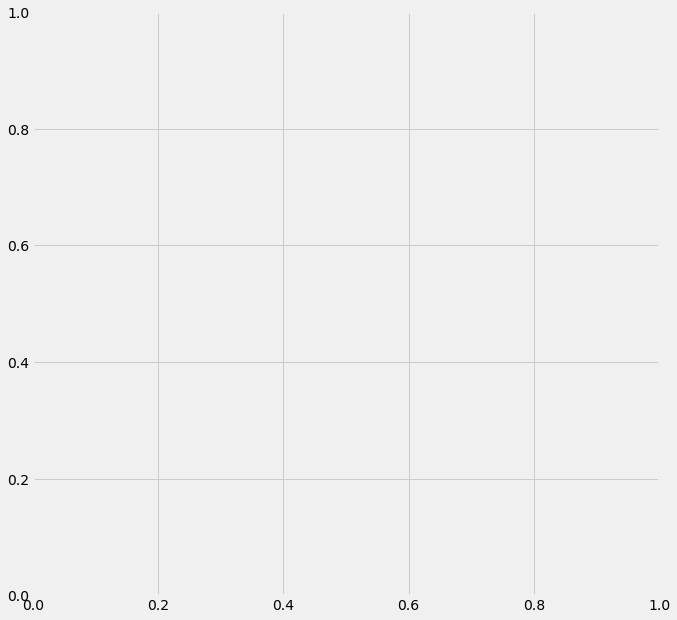

In [39]:
#Use Pandas Plotting with Matplotlib to plot the data
# -- already in this format pd.to_datetime(date, format+%Y-%m-%d').date()for date in index
precipitation_df.plot.bar
plt.xticks('date', nbins=9)

# select position based on timestamp month
# positions = [p for p in precipitation_df.index
#              if p.is_month_start
#              and p.month in range ('date')]
# labels = [1.strftime('%Y-%m-%d') for 1 in positions]

# Plot
#ax = precipitation_df.plot.bar
# ax.set_xlabel('date')
# ax.set_ylabel('prcp)
# ax.set_xticks(positions)
# ax.set_xticklabels(labels)
# plt.show()
# 


In [25]:
precipitation_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [19]:
#this only needs to be done if not already setting precipitation previously
#df_temp = pd.read_sql(precipitation, session.bind)

In [ ]:
# web
#https://docs.sqlalchemy.org/en/13/core/functions.html?highlight=func

In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [43]:
# Design a query to show how many stations are available in this dataset?
# the below should be done using sqlalchemy....count stations
session.query(func.count(Station.station)).all()

[(9)]

In [48]:
# my addition  List all stations in the stations table
session.query(Station.station).all()

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [57]:
for row in session.query(Station.station).limit(15).all():
    print(row)

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


In [58]:
for rows in session.query(Station.station).limit(15).all():
    print(row)

('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)
('USC00516128',)


In [77]:
session.query(Station.station, func.count(Station.station)).\
            group_by(Station.station).\
            order_by(func.count(Station.station).desc()).all()

[('USC00519523', 1),
 ('USC00519397', 1),
 ('USC00519281', 1),
 ('USC00518838', 1),
 ('USC00517948', 1),
 ('USC00516128', 1),
 ('USC00514830', 1),
 ('USC00513117', 1),
 ('USC00511918', 1)]

In [78]:
for rows in session.query(Station.station, func.count(Station.station)).\
             group_by(Station.station).\
             order_by(func.count(Station.station).desc()).all():

SyntaxError: unexpected EOF while parsing (<ipython-input-78-426500420c60>, line 3)

In [54]:
session.execute(session.query(Station).limit(15)).fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [86]:
activity = session.query(Station.station, func.count(Station.station)).\
             group_by(Station.station).\
             order_by(func.count(Station.station).desc()).all()
for rows in activity:

SyntaxError: unexpected EOF while parsing (<ipython-input-86-b97518298ba6>, line 4)

In [73]:
activity = session.query(Station.station, func.count(Station.station)).\
             group_by(Station.station).\
             order_by(func.count(Station.station).desc()).all()
for rows in session.query:

SyntaxError: unexpected EOF while parsing (<ipython-input-73-a33f2df66bd0>, line 4)

[('USC00519523', 1),
 ('USC00519397', 1),
 ('USC00519281', 1),
 ('USC00518838', 1),
 ('USC00517948', 1),
 ('USC00516128', 1),
 ('USC00514830', 1),
 ('USC00513117', 1),
 ('USC00511918', 1)]

In [39]:
#need most active...what makes it most active?

In [62]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

#session.query(count on groupby) ...count by station id
session.query(Station.station, func.count(Station.station).\
             group_by(Station.station).\
             order_by(func.count(Station.station).desc()).all()

SyntaxError: unexpected EOF while parsing (<ipython-input-62-ab00369e9111>, line 7)

In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

#need both stationid and tempurature....are these in the same table?
session.query(station.id, funct.min(station.min))
min max ave temp

In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# *** last 12 same as with prcp
query on temp observed date >  date   station=most active

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
func 

In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

join two tables station nad measurment filter on start and end date  where this = this station id  between dates
my start and end dates
get my list of dates


In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
--just pass the month and date
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates
date range function() pd.date_range()
# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
